## Gaussian Mixture Model - GMM

In [1]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### 1.  Generate some data samples from a 1D GMM with two Gaussian Components

In [2]:
data=np.zeros((1000,))
for n in range(0, 1000):
    #randomly select a Gaussian component (c0, c1) with prob of 0.5
    r= int(np.random.rand() > 0.5)  # rand ~ uniform random distribution
    if r == 0:
       # randomly draw a sample from the Gaussian component (mean = 2, std=1)
       sample =  2 + np.random.randn() 
    else:
       # randomly draw a sample from the Gaussian component (mean = 6, std=1)
       sample =  6 + np.random.randn() 
    data[n]=sample

In [3]:
data

array([ 7.43073185e+00,  7.51414834e+00,  1.72479411e+00,  6.61156965e+00,
        2.37456965e+00,  6.73490420e+00,  5.24744359e+00,  5.50977852e+00,
        4.76862135e+00,  6.96573599e+00,  3.03718676e+00,  5.71814519e+00,
        4.69201049e-01,  6.97901342e+00,  1.34213726e+00,  1.29081418e+00,
        6.14040269e+00,  6.19431365e+00,  3.38351492e+00,  3.27590038e+00,
        1.55804267e+00,  5.87565412e+00,  2.23481900e+00,  5.55628054e+00,
        1.75806893e+00,  1.26800777e+00,  2.62353094e+00,  4.98051222e+00,
        1.58347385e+00,  3.99311517e+00,  6.05321707e+00,  5.95868250e-01,
        6.14652043e+00,  6.49669251e+00,  3.23814887e+00,  2.55598844e+00,
        3.68650273e+00,  5.89470108e+00,  3.11037826e+00,  2.57533703e+00,
        1.38509235e+00,  1.60718615e+00, -2.45316483e-02,  2.33058891e+00,
        3.26123435e+00,  5.49005230e+00,  3.61777415e+00,  2.03068318e+00,
        6.56375752e+00,  3.08347391e+00,  1.36074846e+00,  5.62003882e+00,
        1.95008987e+00,  

visualize the 1D data by using 1D histogram 

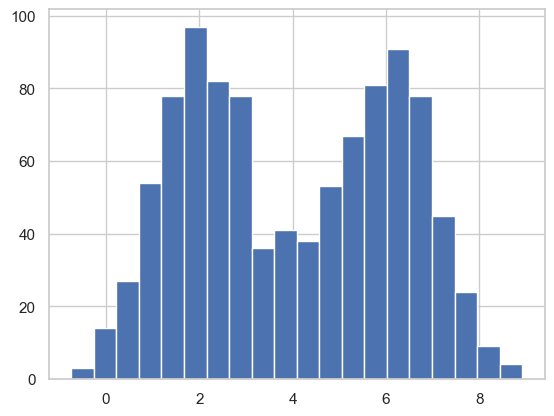

In [4]:
fig, ax = plt.subplots()
ax.hist(data, bins=20);

### 2. Estimate the Parameters of the 1D GMM from  the Data Samples

### Let's pretend that we do not know how the `data` is generated. 
### We 'guess' that the data samples are from a 1D GMM with two Gaussian components.
### Use Maximum Likelihood (ML) method to estimate the parameters of the 1D GMM

In [5]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(2)
#GMM.fit(data) # fit the GMM model to data -> estimate the parameters 
GMM.fit(data.reshape(-1,1)) 

GaussianMixture(n_components=2)

In [6]:
GMM.weights_ # prior probability of each cluster

array([0.50686987, 0.49313013])

In [7]:
GMM.means_

array([[2.08718084],
       [5.97998628]])

In [8]:
GMM.covariances_

array([[[1.05037745]],

       [[1.07811972]]])

In [9]:
score=GMM.score_samples(np.linspace(0, 10, 1000).reshape(1000,1))
pdf = np.exp(score) # pdf of the GMM

Text(0.5, 1.0, 'GMM pdf')

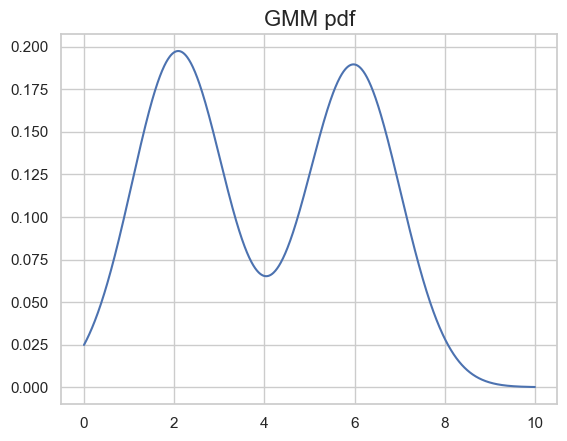

In [10]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.set_title('GMM pdf', fontsize=16)

Then, we do clustering: divide the data into two clusters corresponding to the two Gaussian components 

In [11]:
cluster_label=GMM.predict(data.reshape(-1,1))
cluster_label

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,

Text(0.5, 1.0, 'clustering result')

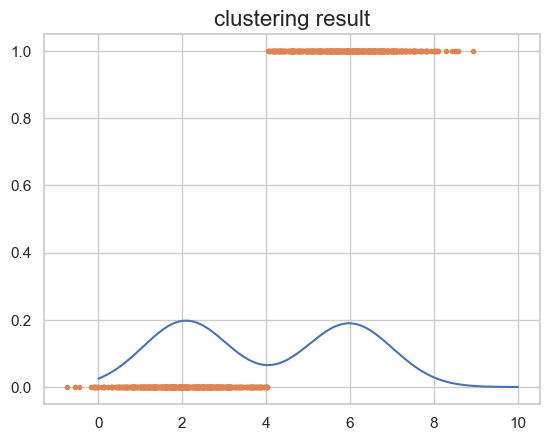

In [12]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.plot(data, cluster_label, '.')
ax.set_title('clustering result', fontsize=16)

Text(0.5, 1.0, 'clustering result on new_data')

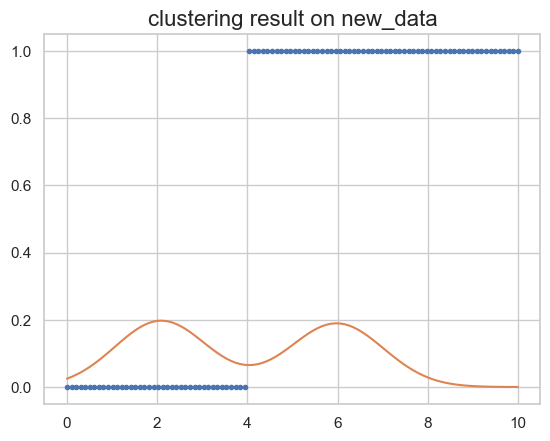

In [13]:
new_data = np.linspace(0, 10, 100).reshape(100,1)
new_label = GMM.predict(new_data)
new_score = GMM.score_samples(new_data)
pdf_value = np.exp(new_score) # pdf of the GMM

fig, ax = plt.subplots()
ax.plot(new_data, new_label, '.')
ax.plot(new_data, pdf_value)
ax.set_title('clustering result on new_data', fontsize=16)

In [14]:
new_data

array([[ 0.        ],
       [ 0.1010101 ],
       [ 0.2020202 ],
       [ 0.3030303 ],
       [ 0.4040404 ],
       [ 0.50505051],
       [ 0.60606061],
       [ 0.70707071],
       [ 0.80808081],
       [ 0.90909091],
       [ 1.01010101],
       [ 1.11111111],
       [ 1.21212121],
       [ 1.31313131],
       [ 1.41414141],
       [ 1.51515152],
       [ 1.61616162],
       [ 1.71717172],
       [ 1.81818182],
       [ 1.91919192],
       [ 2.02020202],
       [ 2.12121212],
       [ 2.22222222],
       [ 2.32323232],
       [ 2.42424242],
       [ 2.52525253],
       [ 2.62626263],
       [ 2.72727273],
       [ 2.82828283],
       [ 2.92929293],
       [ 3.03030303],
       [ 3.13131313],
       [ 3.23232323],
       [ 3.33333333],
       [ 3.43434343],
       [ 3.53535354],
       [ 3.63636364],
       [ 3.73737374],
       [ 3.83838384],
       [ 3.93939394],
       [ 4.04040404],
       [ 4.14141414],
       [ 4.24242424],
       [ 4.34343434],
       [ 4.44444444],
       [ 4

Calculate posterior probability of data under each Gaussian in the model.

Text(0.5, 1.0, 'posterior probability')

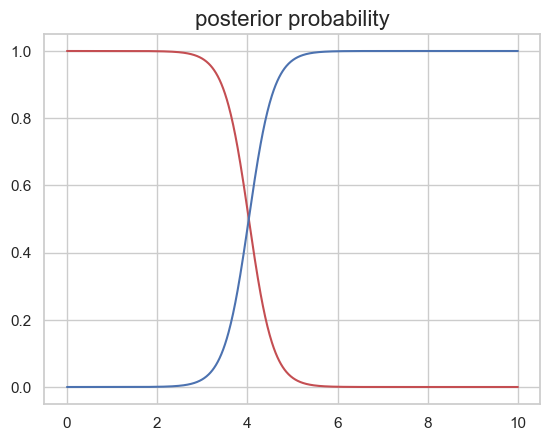

In [15]:
prob=GMM.predict_proba(np.linspace(0, 10, 1000).reshape(1000,1))
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), prob[:,0], 'r')
ax.plot(np.linspace(0, 10, 1000), prob[:,1], 'b')
ax.set_title('posterior probability', fontsize=16)